In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [ ]:
def initialisation(n_0,n_1,n_2):
  W1 = np.random.randn(n_1, n_0)
  b1=np.zeros((n_1,1))
  W2 = np.random.randn(n_2, n_1)
  b2=np.zeros((n_2,1))

  parametres={
      'W1':W1,
      'b1':b1,
      'W2':W2,
      'b2':b2
  }
  return parametres

In [ ]:
def model(X,parametres):
  eps = 1e-15
  W1=parametres['W1']
  b1=parametres['b1']
  W2=parametres['W2']
  b2=parametres['b2']

  Z1=W1.dot(X)+b1

  Z1 = np.clip(Z1, -500, 500)
  A1=1/(1+np.exp(-Z1))
  #A1 = np.clip(A1, eps, 1 - eps)
  Z2=W2.dot(A1)+b2

  A2=1/(1+np.exp(-Z2))
  #A2 = np.clip(A2, eps, 1 - eps)
  caches={
      'A1':A1,
      'A2':A2
  }
  return caches

In [ ]:
def back_propagation(X,y,parametres,caches):
  W1=parametres['W1']
  b1=parametres['b1']
  W2=parametres['W2']
  b2=parametres['b2']
  A1=caches['A1']
  A2=caches['A2']
  m=y.shape[1]
  dZ2=A2-y
  dW2=(1/m)*dZ2.dot(A1.T)

  db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)


  dZ1=W2.T.dot(dZ2)* (A1 * (1 - A1))
  dW1=(1/m)*dZ1.dot(X.T)
  db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

  gradients={
      'dW1':dW1,
      'db1':db1,
      'dW2':dW2,
      'db2':db2
  }
  return gradients

In [ ]:
def cout(y,caches):
  A2=caches['A2']
  m=y.shape[1]
  cout=(-1/m)*np.sum(y*np.log(A2)+(1-y)*np.log(1-A2))
  return cout

In [ ]:
def prediction(X,parametres):
  m=X.shape[1]
  p=np.zeros((1,m))
  caches=model(X,parametres)
  A2=caches['A2']
  p  = (A2 > 0.5).astype(int)
  return (p,A2)

In [ ]:
def activation(parametres,activations,n=0.01,nb_iters=1000):
  W1=parametres['W1']
  b1=parametres['b1']
  W2=parametres['W2']
  b2=parametres['b2']
  dW1=activations['dW1']
  db1=activations['db1']
  dW2=activations['dW2']
  db2=activations['db2']
  W1=W1-n*dW1
  b1=b1-n*db1
  W2=W2-n*dW2
  b2=b2-n*db2
  parametres={
      'W1':W1,
      'b1':b1,
      'W2':W2,
      'b2':b2
  }
  return parametres

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
def reseau_neurones(X_train,y_train,n_1,pas,nb_iters):
  n_0=X_train.shape[0]

  n_2=y.shape[0]
  train_loss=[]
  train_acc=[]

  parametres=initialisation(n_0,n_1,n_2)
  for i in tqdm(range(nb_iters)):

    caches = model(X_train, parametres)
    gradients = back_propagation(X_train, y_train, parametres, caches)



    parametres=activation(parametres,gradients,pas)

    if i%10==0:
      train_loss.append(cout(y_train,caches))
      y_pred = prediction(X_train, parametres)
      train_acc.append(accuracy_score(y_train.flatten(),y_pred[0].flatten()))
  plt.figure(figsize=(12,5))

  plt.subplot(1,2,1)
  plt.plot(train_loss,label='train loss')
  plt.legend()
  plt.title('Loss')

  plt.subplot(1,2,2)
  plt.plot(train_acc,label='train acc')
  plt.legend()
  plt.title('Accuracy')

  return parametres

In [ ]:
def afficher_decision(X, y, parametres):
    x_min, x_max = X[0, :].min() - 0.1, X[0, :].max() + 0.1
    y_min, y_max = X[1, :].min() - 0.1, X[1, :].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

    # Forme correcte pour l’entrée du modèle : (n_features, m)
    grille = np.c_[xx.ravel(), yy.ravel()].T
    Z = prediction(grille, parametres)
    Z = Z[0].reshape(xx.shape)



    y_pred=prediction(X_test,parametres)
    print(f"Le score de prédiction est de {accuracy_score(y_test.flatten(),y_pred[0].flatten())*100} %")

    # Tracé
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap="summer", alpha=0.5)
    plt.scatter(X[0, :], X[1, :], c=y.flatten(), cmap="summer", edgecolors='k')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

Dimensions de X est: (2, 2000)
Dimensions de y est: (1, 2000)


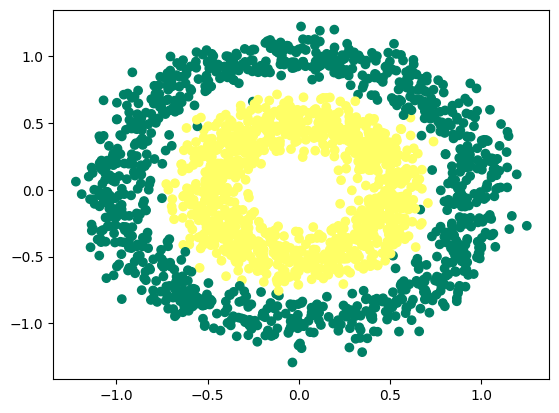

In [ ]:
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=2000,factor=0.52,noise=0.1,random_state=0)
y=y.reshape(1,y.shape[0])
X=X.T
print(f"Dimensions de X est: {X.shape}")
print(f"Dimensions de y est: {y.shape}")


plt.scatter(X[0,:],X[1,:],c=y,cmap="summer")
plt.show()

100%|██████████| 5000/5000 [00:24<00:00, 201.46it/s]


Le score de prédiction est de 98.625 %


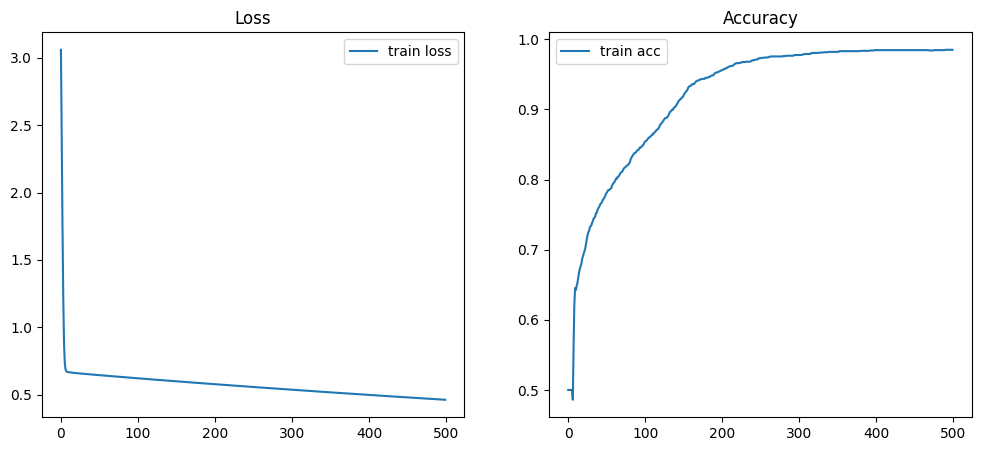

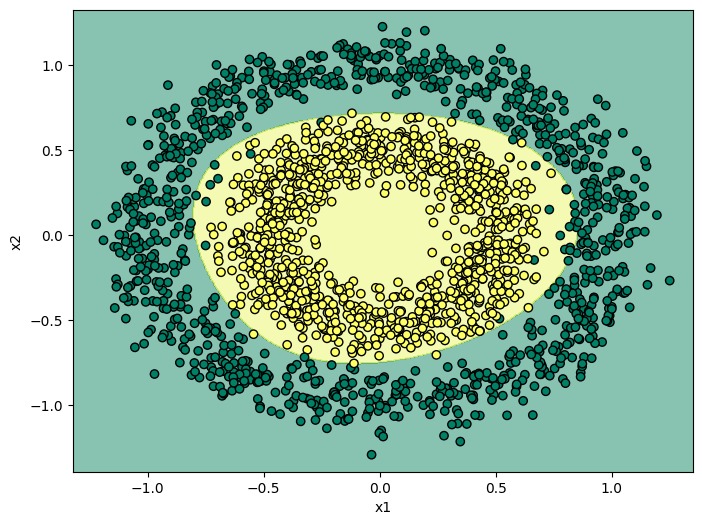

In [ ]:
parametres=reseau_neurones(X,y,n_1=84,pas=0.01,nb_iters=5000)
afficher_decision(X, y, parametres)

In [ ]:
from sklearn.model_selection import train_test_split

X_t,y_t=make_circles(n_samples=1000,factor=0.52,noise=0.1,random_state=0)

X_train,X_test,y_train,y_test=train_test_split(X_t,y_t,test_size=0.8,random_state=0)
y_train=y_train.reshape(1,y_train.shape[0])
y_test=y_test.reshape(1,y_test.shape[0])
X_train=X_train.T
X_test=X_test.T

print(f'Dimension de X_test: {X_test.shape} ')
print(f'Dimension de y_test: {y_test.shape} ')

y_predi=prediction(X_test,parametres)
print(f"Le score de prédiction est de {accuracy_score(y_test.flatten(),y_predi[0].flatten())*100} %")

Dimension de X_test: (2, 800) 
Dimension de y_test: (1, 800) 
Le score de prédiction est de 98.625 %


Le score de prédiction est de 98.625 %


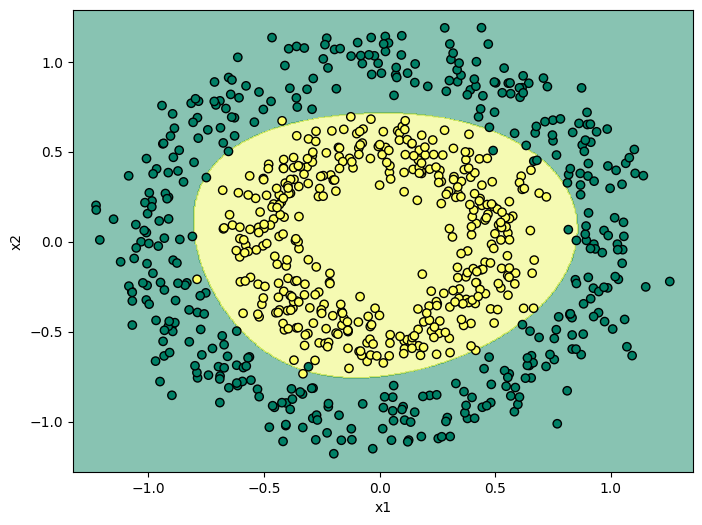

In [ ]:

afficher_decision(X_test, y_test, parametres)

#Deploiement pour predire un point


In [803]:
def affichage_prediction(X, y, parametres,X_ap):
    x_min, x_max = X[0, :].min() - 0.1, X[0, :].max() + 0.1
    y_min, y_max = X[1, :].min() - 0.1, X[1, :].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))


    grille = np.c_[xx.ravel(), yy.ravel()].T
    Z = prediction(grille, parametres)
    Z = Z[0].reshape(xx.shape)



    y_pred=prediction(X_test,parametres)
    # Tracé
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap="summer", alpha=0.5)
    plt.scatter(X[0, :], X[1, :], c=y.flatten(), cmap="summer", edgecolors='k')
    plt.title("Frontière de décision du réseau de neurones")
    plt.scatter(X_ap[0], X_ap[1], color='red', s=25,label='Point entré',edgecolors='k')
    classe_predite = prediction(X_ap.reshape(2, 1), parametres)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.show()

Entrer la valeur de x1: 1
Entrer la valeur de x2: 2
La probabilité que votre point soit de la classe 0 est 96.69 %


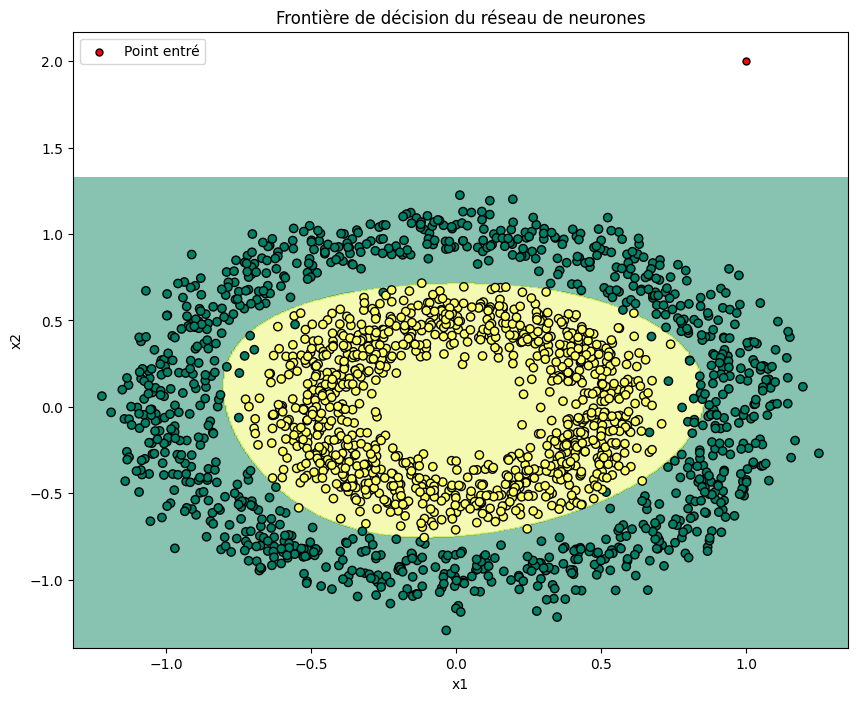

In [804]:
x1=input("Entrer la valeur de x1: ")
x2=input("Entrer la valeur de x2: ")
x1=float(x1)
x2=float(x2)
X_ap=np.array([[x1,x2]])
X_ap=X_ap.T
y_predi,A2=prediction(X_ap,parametres)
y_predi=y_predi.flatten()
if y_predi[0]==0:
  print(f"La probabilité que votre point soit de la classe {y_predi[0]} est {round((1-A2[0][0])*100,2)} %")
else:
  print(f"La probabilité que votre point soit de la classe {y_predi[0]} est {round(A2[0][0]*100,2)} %")

affichage_prediction(X, y, parametres,X_ap)
